# HW 2 - _Group 18_ - HOW DO TAXIS MOVE IN NYC?

In this assignment we have to conduct an analysis of Yellow Cab Taxis in NYC. In particular, we have answered to some specific research questions (**RQs**) and core research questions (**CRQs**). The first step is read the homework questions and then download data of Taxi's trips in NYC from _www.nyc.gov_.

The data are divided in months (from January to June 2018). Each month contains around 9.000.000 Taxi's trips, so, due to the size of the files, we have worked with _**Pandas library**_, which is useful to manipulate huge numerical tables and time series. We decided to focus on a single month, performing all our analysis over a single dataset, and then repeated the same analysis on the other months. At the end of each question we have combined and motiveted the results obtained. 

After a first look to the yallow cab data, we realised that lots of data were incorrect or in the wrong month.
We decided therefore to delete all the mistakes in accordance with the required assignment questions. We've analyzed these column indexes:
- **tpep_pickup_datetime**: the date and time when the meter was engaged;
- **tpep_dropoff_datetime**: The date and time when the meter was disengaged;
- **passenger_count**: the number of passengers in the vehicle;
- **trip_distance**: the elapsed trip distance in miles reported by the taximeter;
- **PULocationID**: TLC Taxi Zone in which the taximeter was engaged;
- **DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged.

## Homework 2

First of all we have to import:
- _**date time module**_: to manipulate dates and times in DataFrame;
- _**pandas library**_: to generate and analize data frames.
- _**numpy library**_: to operate with mathematical functions and multi-dimensional arrays.

In [1]:
import datetime as dt

import pandas as pd

import numpy as np

## Taxi Zone

Before cleaning data, we create the DataFrame of ***taxi _zone_lookup*** file, which contains all LocationID and Borough of NYC. 

Then, we create a dictionary (***dfdict***) of boroughs, and build the list of locations for each borough (6 boroughs vs of 265 NY locations).

In [2]:
df = pd.read_csv("taxi _zone_lookup.csv")

dfdict = {'EWR': [], 'Queens': [], 'Bronx': [], 'Manhattan': [], 'Staten Island': [], 'Brooklyn': [], 'Unknown': []}

for i in range(len(df)):    
    dfdict[df["Borough"][i]].append(df["LocationID"][i])

## Cleaning Data


Now, for each month, we read and clean all the DataFrames specifying the column indexes that we want to analyze.

Also, we use ***parse_dates = date_columns*** to return the entire columns unaltered as an object data type.

### January

In [3]:
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df1 = pd.read_csv('yellow_tripdata_2018-01.csv', usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], parse_dates = date_columns)

To verify the correct transformation of *pickup datetime* and *dropoff datetime* we use ***type()***:

In [4]:
type(df1.tpep_pickup_datetime[0])

type(df1.tpep_dropoff_datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

In each month we notice some errors about year and months. In this case, for January DataFrame (df1), we have to consider only 2018 and the month 1 (january). So, we delete, in *pickup datetime* and *dropoff datetime*, all rows with a different year and/or month.  

In [5]:
keep = df1[df1['tpep_pickup_datetime'].dt.year == 2018]

keep = keep[keep['tpep_pickup_datetime'].dt.month == 1]

keep = keep[keep['tpep_dropoff_datetime'].dt.year == 2018]
keep = keep[keep['tpep_dropoff_datetime'].dt.month == 1]

Moreover, we've found errors in days and hours. Infact, if we have only 2018 and january in both datetime columns, the *pickup day* cannot be a following day of *dropoff day*; this is impossible. *Pickup day* can be equal to *dropoff day* or can be one day/few days before of *dropoff day*. If the *pickup day* and *dropoff day* are the same, *pickup time* (h.min.sec) must be lower than *dropoff time*.

In [6]:
keep1 = keep[keep['tpep_pickup_datetime'].dt.day == keep['tpep_dropoff_datetime'].dt.day]

keep1 = keep1[keep1['tpep_pickup_datetime'].dt.time < keep1['tpep_dropoff_datetime'].dt.time]

keep2 = keep[keep['tpep_pickup_datetime'].dt.day < keep['tpep_dropoff_datetime'].dt.day]

Then, we concatenate on axis=0 the two conditions (*keep1* and *keep2*) to obtain the ***keep_jan*** dataframe cleaned by wrong dates.

In [7]:
keep_jan = pd.concat([keep1, keep2], axis=0)

Also, we want to delete long trip's durations, because normally taxi's rides are quick enough. 
We've fixed a limit of 5 hours. 

To obtain ***trip_duration_january*** we subtract *pickup datetime* to *dropoff datetime*; then, to manipulate the hours, we use ***numpy*** to transform *'tpep_pickup_datetime'* and *'tpep_dropoff_datetime'* columns from *TimeDelta* to *DateTime*.

In [8]:
keep_jan['trip_duration_january'] = keep_jan['tpep_dropoff_datetime'] - keep_jan['tpep_pickup_datetime']

keep_jan['trip_duration_january'] = keep_jan['trip_duration_january'] / np.timedelta64(1, 'h')

keep_jan = keep_jan[keep_jan['trip_duration_january'] <= 5]

We want to remove the ***Unknown Borough*** (LocationID = 264 and 265) from our DataFrame:

In [9]:
keep_jan = keep_jan[(keep_jan.PULocationID != 264) & (keep_jan.DOLocationID != 264) & (keep_jan.PULocationID != 265) & (keep_jan.DOLocationID != 265)]

Finally, we delete all ***'trip_distance'*** = 0: trip distance cannot be zero miles. 

In [10]:
keep_jan = keep_jan[keep_jan['trip_distance'] > 0]

We execute the same cleaning steps for all the other months:

### February

In [11]:
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df2 = pd.read_csv('yellow_tripdata_2018-02.csv', usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], parse_dates = date_columns)

keep = df2[df2['tpep_pickup_datetime'].dt.year == 2018]

keep = keep[keep['tpep_pickup_datetime'].dt.month == 2]

keep = keep[keep['tpep_dropoff_datetime'].dt.year == 2018]
keep = keep[keep['tpep_dropoff_datetime'].dt.month == 2]

keep1 = keep[keep['tpep_pickup_datetime'].dt.day == keep['tpep_dropoff_datetime'].dt.day]

keep1 = keep1[keep1['tpep_pickup_datetime'].dt.time < keep1['tpep_dropoff_datetime'].dt.time]

keep2 = keep[keep['tpep_pickup_datetime'].dt.day < keep['tpep_dropoff_datetime'].dt.day]

keep_feb = pd.concat([keep1, keep2], axis=0)

keep_feb['trip_duration_february'] = keep_feb['tpep_dropoff_datetime'] - keep_feb['tpep_pickup_datetime']

keep_feb['trip_duration_february'] = keep_feb['trip_duration_february'] / np.timedelta64(1, 'h')

keep_feb = keep_feb[keep_feb['trip_duration_february'] <= 5]

keep_feb = keep_feb[(keep_feb.PULocationID != 264) & (keep_feb.DOLocationID != 264) & (keep_feb.PULocationID != 265) & (keep_feb.DOLocationID != 265)]

keep_feb = keep_feb[keep_feb['trip_distance'] > 0]

### March

In [12]:
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df3 = pd.read_csv('yellow_tripdata_2018-03.csv', usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], parse_dates = date_columns)

keep = df3[df3['tpep_pickup_datetime'].dt.year == 2018]

keep = keep[keep['tpep_pickup_datetime'].dt.month == 3]

keep = keep[keep['tpep_dropoff_datetime'].dt.year == 2018]
keep = keep[keep['tpep_dropoff_datetime'].dt.month == 3]

keep1 = keep[keep['tpep_pickup_datetime'].dt.day == keep['tpep_dropoff_datetime'].dt.day]

keep1 = keep1[keep1['tpep_pickup_datetime'].dt.time < keep1['tpep_dropoff_datetime'].dt.time]

keep2 = keep[keep['tpep_pickup_datetime'].dt.day < keep['tpep_dropoff_datetime'].dt.day]

keep_mar = pd.concat([keep1, keep2], axis=0)

keep_mar['trip_duration_march'] = keep_mar['tpep_dropoff_datetime'] - keep_mar['tpep_pickup_datetime']

keep_mar['trip_duration_march'] = keep_mar['trip_duration_march'] / np.timedelta64(1, 'h')

keep_mar = keep_mar[keep_mar['trip_duration_march'] <= 5]

keep_mar = keep_mar[(keep_mar.PULocationID != 264) & (keep_mar.DOLocationID != 264) & (keep_mar.PULocationID != 265) & (keep_mar.DOLocationID != 265)]

keep_mar = keep_mar[keep_mar['trip_distance'] > 0]

### April

In [13]:
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df4 = pd.read_csv('yellow_tripdata_2018-04.csv', usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], parse_dates = date_columns)

keep = df4[df4['tpep_pickup_datetime'].dt.year == 2018]

keep = keep[keep['tpep_pickup_datetime'].dt.month == 4]

keep = keep[keep['tpep_dropoff_datetime'].dt.year == 2018]
keep = keep[keep['tpep_dropoff_datetime'].dt.month == 4]

keep1 = keep[keep['tpep_pickup_datetime'].dt.day == keep['tpep_dropoff_datetime'].dt.day]

keep1 = keep1[keep1['tpep_pickup_datetime'].dt.time < keep1['tpep_dropoff_datetime'].dt.time]

keep2 = keep[keep['tpep_pickup_datetime'].dt.day < keep['tpep_dropoff_datetime'].dt.day]

keep_apr = pd.concat([keep1, keep2], axis=0)

keep_apr['trip_duration_april'] = keep_apr['tpep_dropoff_datetime'] - keep_apr['tpep_pickup_datetime']

keep_apr['trip_duration_april'] = keep_apr['trip_duration_april'] / np.timedelta64(1, 'h')

keep_apr = keep_apr[keep_apr['trip_duration_april'] <= 5]

keep_apr = keep_apr[(keep_apr.PULocationID != 264) & (keep_apr.DOLocationID != 264) & (keep_apr.PULocationID != 265) & (keep_apr.DOLocationID != 265)]

keep_apr = keep_apr[keep_apr['trip_distance'] > 0]

### May

In [14]:
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df5 = pd.read_csv('yellow_tripdata_2018-05.csv', usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], parse_dates = date_columns)

keep = df5[df5['tpep_pickup_datetime'].dt.year == 2018]

keep = keep[keep['tpep_pickup_datetime'].dt.month == 5]

keep = keep[keep['tpep_dropoff_datetime'].dt.year == 2018]
keep = keep[keep['tpep_dropoff_datetime'].dt.month == 5]

keep1 = keep[keep['tpep_pickup_datetime'].dt.day == keep['tpep_dropoff_datetime'].dt.day]

keep1 = keep1[keep1['tpep_pickup_datetime'].dt.time < keep1['tpep_dropoff_datetime'].dt.time]

keep2 = keep[keep['tpep_pickup_datetime'].dt.day < keep['tpep_dropoff_datetime'].dt.day]

keep_may = pd.concat([keep1, keep2], axis=0)

keep_may['trip_duration_may'] = keep_may['tpep_dropoff_datetime'] - keep_may['tpep_pickup_datetime']

keep_may['trip_duration_may'] = keep_may['trip_duration_may'] / np.timedelta64(1, 'h')

keep_may = keep_may[keep_may['trip_duration_may'] <= 5]

keep_may = keep_may[(keep_may.PULocationID != 264) & (keep_may.DOLocationID != 264) & (keep_may.PULocationID != 265) & (keep_may.DOLocationID != 265)]

keep_may = keep_may[keep_may['trip_distance'] > 0]

### June

In [15]:
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df6 = pd.read_csv('yellow_tripdata_2018-06.csv', usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], parse_dates = date_columns)

keep = df6[df6['tpep_pickup_datetime'].dt.year == 2018]

keep = keep[keep['tpep_pickup_datetime'].dt.month == 6]

keep = keep[keep['tpep_dropoff_datetime'].dt.year == 2018]
keep = keep[keep['tpep_dropoff_datetime'].dt.month == 6]

keep1 = keep[keep['tpep_pickup_datetime'].dt.day == keep['tpep_dropoff_datetime'].dt.day]

keep1 = keep1[keep1['tpep_pickup_datetime'].dt.time < keep1['tpep_dropoff_datetime'].dt.time]

keep2 = keep[keep['tpep_pickup_datetime'].dt.day < keep['tpep_dropoff_datetime'].dt.day]

keep_jun = pd.concat([keep1, keep2], axis=0)

keep_jun['trip_duration_june'] = keep_jun['tpep_dropoff_datetime'] - keep_jun['tpep_pickup_datetime']

keep_jun['trip_duration_june'] = keep_jun['trip_duration_june'] / np.timedelta64(1, 'h')

keep_jun = keep_jun[keep_jun['trip_duration_june'] <= 5]

keep_jun = keep_jun[(keep_jun.PULocationID != 264) & (keep_jun.DOLocationID != 264) & (keep_jun.PULocationID != 265) & (keep_jun.DOLocationID != 265)]

keep_jun = keep_jun[keep_jun['trip_distance'] > 0]

# RQ1

### January

We want to analyze the daily average of the number of trips, in Janaury, for every borough (EWR, Queens, Bronx, Manhattan, Staten Island, Brooklyn). We choose to focus on the trips starting in each borough, i.e. the "pickups".

In [10]:
# create a copy final_jan of the cleaned dataframe keep_jan
# this copy will be edited in the next steps, leaving the cleaned dataset unaltered

final_jan = keep_jan.copy()

In [ ]:
# count daily trips based on pickup datetime
# count total trips based on location

date_time_col = final_jan['tpep_pickup_datetime']
location_col = final_jan['PULocationID']

# create series "final_jan_loc", of counts by location
# create series "final_jan", of daily counts

final_jan_loc = location_col.groupby(location_col).count()
final_jan = date_time_col.groupby(date_time_col.dt.day).count()

In [12]:
# compute mean

mean1 = final_jan.mean()
mean1

274776.8064516129

In [37]:
del final_jan

In [13]:
# count total number of trips for each borough

# this dictionary contains the count for each borough

borough_count = {'EWR': 0, 'Queens': 0, 'Bronx': 0, 'Manhattan': 0, 'Staten Island': 0, 'Brooklyn': 0, 'Unknown': 0}

# for every total count in final_jan_loc
for i in range(1, len(final_jan_loc)):
    
    # get the corresponding LocationID
    LocationID = final_jan_loc.index[i]
    
    # check to what borough it belongs
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            
            # add the count for that location to the correct borough
            borough_count[borough] = borough_count[borough] + int(final_jan_loc[LocationID])
            
borough_count

{'EWR': 0,
 'Queens': 503944,
 'Bronx': 6578,
 'Manhattan': 7909258,
 'Staten Island': 109,
 'Brooklyn': 98021,
 'Unknown': 0}

In [38]:
del final_jan_loc

In [15]:
# compute means from total counts 

# for every borough

for borough in borough_count:
    
    # divide count by the number of days in the month
    
    borough_count[borough] = borough_count[borough]/31
    
borough_count

{'EWR': 0.0,
 'Queens': 16256.258064516129,
 'Bronx': 212.19354838709677,
 'Manhattan': 255137.35483870967,
 'Staten Island': 3.5161290322580645,
 'Brooklyn': 3161.967741935484,
 'Unknown': 0.0}

In [19]:
# Convert list of boroughs and list of daily means to DataFrame

df_borough = pd.DataFrame(list(borough_count.keys()), columns = ["Borough"])
df_means = pd.DataFrame(list(borough_count.values()), columns = ["Daily average"])
merge = df_borough.join(df_means)
merge

,Borough,Daily average
0,EWR,0.000000
1,Queens,16256.258065
2,Bronx,212.193548
3,Manhattan,255137.354839
4,Staten Island,3.516129
5,Brooklyn,3161.967742
6,Unknown,0.000000


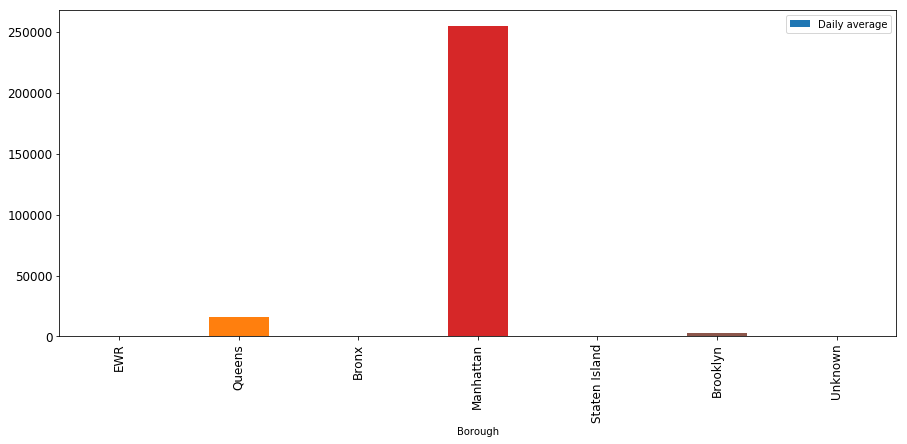

In [20]:
# Plot an bar graph

barplot = merge.plot(x="Borough", y="Daily average", kind='bar', figsize = (15, 6), fontsize = 12)

The bar plot shows that the daily average of trips starting in Manhattan is undeniably higher than the daily average in any other borough. The reason for this is that yellow taxis run mostly from Manhattan to the other boroughs


We are now going to perform the same kind of analysis for the other months

### February

In [22]:
final_feb = keep_feb.copy()

In [ ]:
date_time_col = final_feb['tpep_pickup_datetime']
location_col = final_feb['PULocationID']

final_feb_loc = location_col.groupby(location_col).count()
final_feb = date_time_col.groupby(date_time_col.dt.day).count()

In [24]:
mean2 = final_feb.mean()
mean2

295547.6785714286

In [35]:
del final_feb

In [26]:
borough_count = {'EWR': 0, 'Queens': 0, 'Bronx': 0, 'Manhattan': 0, 'Staten Island': 0, 'Brooklyn': 0, 'Unknown': 0}

for i in range(1, len(final_feb_loc)):
    LocationID = final_feb_loc.index[i]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough] = borough_count[borough] + int(final_feb_loc[LocationID])
            
borough_count

{'EWR': 0,
 'Queens': 463535,
 'Bronx': 5812,
 'Manhattan': 7712801,
 'Staten Island': 78,
 'Brooklyn': 92951,
 'Unknown': 0}

In [28]:
for borough in borough_count:    
    borough_count[borough] = borough_count[borough]/28
    
borough_count

{'EWR': 0.0,
 'Queens': 16554.821428571428,
 'Bronx': 207.57142857142858,
 'Manhattan': 275457.1785714286,
 'Staten Island': 2.7857142857142856,
 'Brooklyn': 3319.6785714285716,
 'Unknown': 0.0}

In [36]:
del final_feb_loc

In [31]:
df_borough = pd.DataFrame(list(borough_count.keys()), columns = ["Borough"])
df_means = pd.DataFrame(list(borough_count.values()), columns = ["Daily average"])
merge = df_borough.join(df_means)
merge

,Borough,Daily average
0,EWR,0.000000
1,Queens,16554.821429
2,Bronx,207.571429
3,Manhattan,275457.178571
4,Staten Island,2.785714
5,Brooklyn,3319.678571
6,Unknown,0.000000


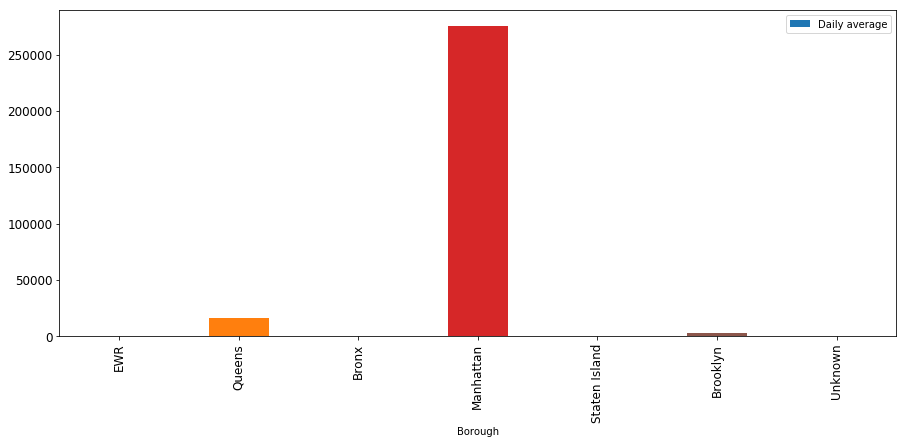

In [32]:
barplot = merge.plot(x="Borough", y="Daily average", kind='bar', figsize = (15, 6), fontsize = 12)

Again, the bar plot shows that the daily average of trips starting in Manhattan is higher than the daily average in any other borough.

### March

In [4]:
final_mar = keep_mar.copy()

In [5]:
date_time_col = final_mar['tpep_pickup_datetime']
location_col = final_mar['PULocationID']

final_mar_loc = location_col.groupby(location_col).count()
final_mar = date_time_col.groupby(date_time_col.dt.day).count()
final_mar

tpep_pickup_datetime
1     324856
2     319285
3     308661
4     278671
5     281847
6     307261
7     227735
8     318737
9     339034
10    332452
11    270200
12    285916
13    299480
14    327166
15    339036
16    339336
17    315209
18    269660
19    263818
20    303767
21    179421
22    293164
23    316488
24    301707
25    267679
26    272626
27    290284
28    306370
29    317654
30    300339
31    275228
Name: tpep_pickup_datetime, dtype: int64

In [6]:
mean3 = final_mar.mean()
mean3

295906.03225806454

In [7]:
del final_mar

In [11]:
borough_count = {'EWR': 0, 'Queens': 0, 'Bronx': 0, 'Manhattan': 0, 'Staten Island': 0, 'Brooklyn': 0, 'Unknown': 0}

for i in range(1, len(final_mar_loc)):
    LocationID = final_mar_loc.index[i]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough] = borough_count[borough] + int(final_mar_loc[LocationID])
            
borough_count

{'EWR': 0,
 'Queens': 539763,
 'Bronx': 9537,
 'Manhattan': 8503252,
 'Staten Island': 102,
 'Brooklyn': 120261,
 'Unknown': 0}

In [13]:
del final_mar_loc

In [12]:
for borough in borough_count:    
    borough_count[borough] = borough_count[borough]/31
    
borough_count

{'EWR': 0.0,
 'Queens': 17411.709677419356,
 'Bronx': 307.64516129032256,
 'Manhattan': 274298.4516129032,
 'Staten Island': 3.2903225806451615,
 'Brooklyn': 3879.3870967741937,
 'Unknown': 0.0}

In [15]:
df_borough = pd.DataFrame(list(borough_count.keys()), columns = ["Borough"])
df_means = pd.DataFrame(list(borough_count.values()), columns = ["Daily average"])
merge = df_borough.join(df_means)
merge

,Borough,Daily average
0,EWR,0.000000
1,Queens,17411.709677
2,Bronx,307.645161
3,Manhattan,274298.451613
4,Staten Island,3.290323
5,Brooklyn,3879.387097
6,Unknown,0.000000


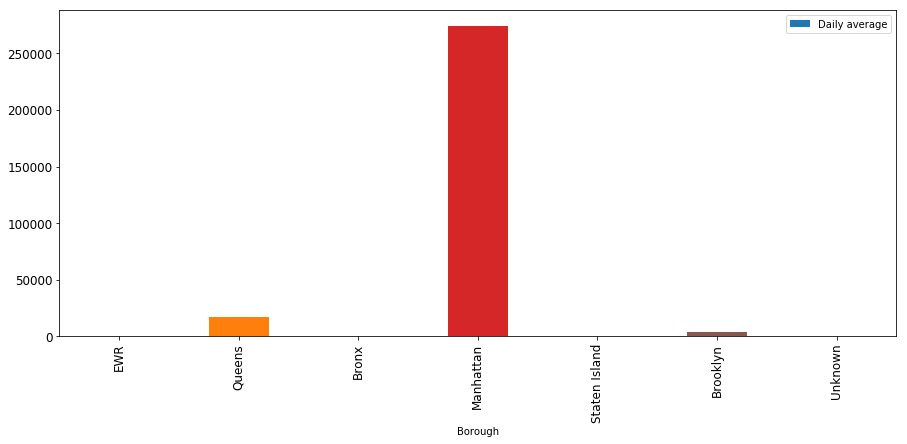

In [18]:
barplot = merge.plot(x="Borough", y="Daily average", kind='bar', figsize = (15, 6), fontsize = 12)

### April

In [21]:
final_apr = keep_apr.copy()

In [22]:
date_time_col = final_apr['tpep_pickup_datetime']
location_col = final_apr['PULocationID']

final_apr_loc = location_col.groupby(location_col).count()
final_apr = date_time_col.groupby(date_time_col.dt.day).count()
final_apr

tpep_pickup_datetime
1     237919
2     252261
3     298417
4     303713
5     322664
6     318322
7     312706
8     271131
9     276634
10    300003
11    312520
12    319446
13    325078
14    339155
15    292407
16    274135
17    313934
18    312630
19    340085
20    337039
21    310548
22    269560
23    277851
24    302071
25    318297
26    323372
27    324977
28    317480
29    274424
30    287326
Name: tpep_pickup_datetime, dtype: int64

In [23]:
mean4 = final_apr.mean()
mean4

302203.5

In [24]:
del final_apr

In [25]:
borough_count = {'EWR': 0, 'Queens': 0, 'Bronx': 0, 'Manhattan': 0, 'Staten Island': 0, 'Brooklyn': 0, 'Unknown': 0}

for i in range(1, len(final_apr_loc)):
    LocationID = final_apr_loc.index[i]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough] = borough_count[borough] + int(final_apr_loc[LocationID])
            
borough_count

{'EWR': 0,
 'Queens': 570520,
 'Bronx': 9737,
 'Manhattan': 8369011,
 'Staten Island': 91,
 'Brooklyn': 116559,
 'Unknown': 0}

In [26]:
del final_apr_loc

In [27]:
for borough in borough_count:    
    borough_count[borough] = borough_count[borough]/30
    
borough_count

{'EWR': 0.0,
 'Queens': 19017.333333333332,
 'Bronx': 324.56666666666666,
 'Manhattan': 278967.0333333333,
 'Staten Island': 3.033333333333333,
 'Brooklyn': 3885.3,
 'Unknown': 0.0}

In [30]:
df_borough = pd.DataFrame(list(borough_count.keys()), columns = ["Borough"])
df_means = pd.DataFrame(list(borough_count.values()), columns = ["Daily average"])
merge = df_borough.join(df_means)
merge

,Borough,Daily average
0,EWR,0.000000
1,Queens,19017.333333
2,Bronx,324.566667
3,Manhattan,278967.033333
4,Staten Island,3.033333
5,Brooklyn,3885.300000
6,Unknown,0.000000


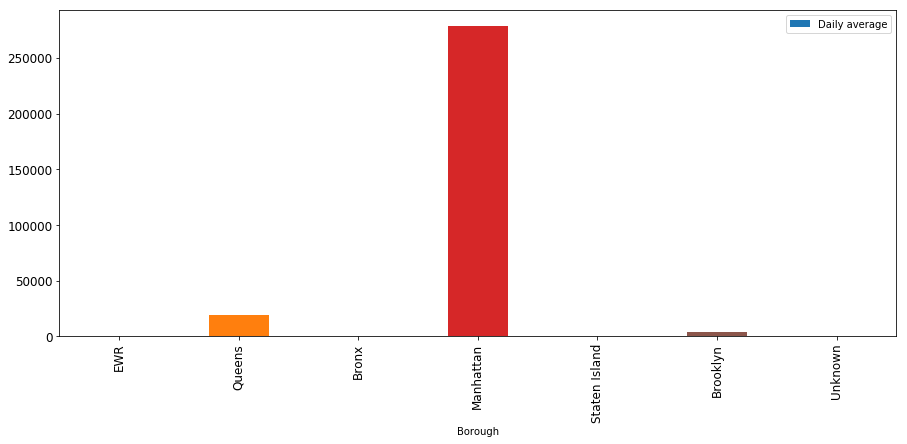

In [31]:
barplot = merge.plot(x="Borough", y="Daily average", kind='bar', figsize = (15, 6), fontsize = 12)

### May

In [5]:
final_may = keep_may.copy()

In [6]:
date_time_col = final_may['tpep_pickup_datetime']
location_col = final_may['PULocationID']

final_may_loc = location_col.groupby(location_col).count()
final_may = date_time_col.groupby(date_time_col.dt.day).count()
final_may

tpep_pickup_datetime
1     297910
2     313770
3     326969
4     325487
5     325490
6     273213
7     277727
8     302919
9     309374
10    320836
11    316722
12    313984
13    274587
14    287158
15    301458
16    312874
17    320145
18    323626
19    310069
20    260704
21    272303
22    291028
23    293229
24    297863
25    272959
26    230910
27    198563
28    183105
29    268923
30    294015
31    305146
Name: tpep_pickup_datetime, dtype: int64

In [7]:
mean5 = final_may.mean()
mean5

290421.48387096776

In [8]:
del final_may

In [9]:
borough_count = {'EWR': 0, 'Queens': 0, 'Bronx': 0, 'Manhattan': 0, 'Staten Island': 0, 'Brooklyn': 0, 'Unknown': 0}

for i in range(1, len(final_may_loc)):
    LocationID = final_may_loc.index[i]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough] = borough_count[borough] + int(final_may_loc[LocationID])
            
borough_count

{'EWR': 0,
 'Queens': 584976,
 'Bronx': 10131,
 'Manhattan': 8287431,
 'Staten Island': 115,
 'Brooklyn': 120190,
 'Unknown': 0}

In [10]:
del final_may_loc

In [11]:
for borough in borough_count:
    borough_count[borough] = borough_count[borough]/31
    
borough_count

{'EWR': 0.0,
 'Queens': 18870.1935483871,
 'Bronx': 326.80645161290323,
 'Manhattan': 267336.48387096776,
 'Staten Island': 3.7096774193548385,
 'Brooklyn': 3877.0967741935483,
 'Unknown': 0.0}

In [12]:
df_borough = pd.DataFrame(list(borough_count.keys()), columns = ["Borough"])
df_means = pd.DataFrame(list(borough_count.values()), columns = ["Daily mean"])
merge = df_borough.join(df_means)
merge

,Borough,Daily mean
0,EWR,0.000000
1,Queens,18870.193548
2,Bronx,326.806452
3,Manhattan,267336.483871
4,Staten Island,3.709677
5,Brooklyn,3877.096774
6,Unknown,0.000000


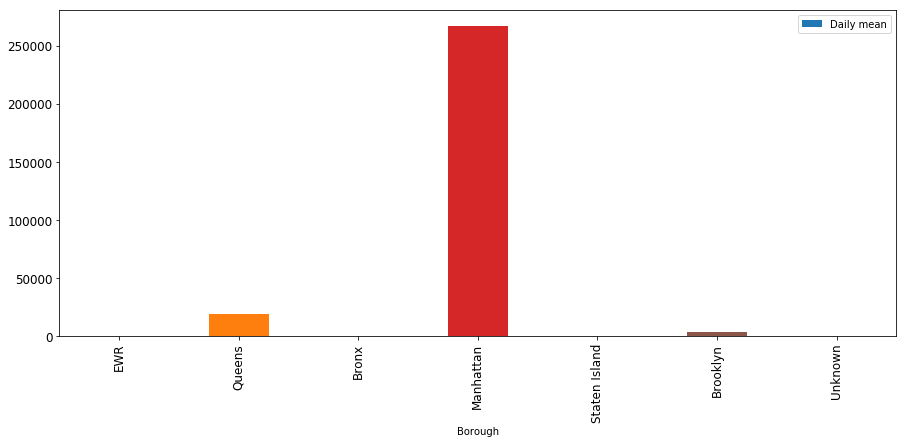

In [14]:
barplot = merge.plot(x="Borough", y="Daily mean", kind='bar', figsize = (15, 6), fontsize = 12)

### June

In [17]:
final_jun = keep_jun.copy()

In [20]:
date_time_col = final_jun['tpep_pickup_datetime']
location_col = final_jun['PULocationID']

final_jun_loc = location_col.groupby(location_col).count()
final_jun = date_time_col.groupby(date_time_col.dt.day).count()
final_jun

tpep_pickup_datetime
1     313199
2     301034
3     258464
4     272594
5     291133
6     307710
7     311645
8     308184
9     286493
10    243115
11    271619
12    288430
13    305730
14    308700
15    274572
16    268599
17    241097
18    274537
19    291280
20    300064
21    301721
22    303902
23    267140
24    237308
25    260788
26    280038
27    290673
28    294972
29    277614
30    262534
Name: tpep_pickup_datetime, dtype: int64

In [21]:
mean6 = final_jun.mean()
mean6

283162.9666666667

In [22]:
del final_jun

In [23]:
borough_count = {'EWR': 0, 'Queens': 0, 'Bronx': 0, 'Manhattan': 0, 'Staten Island': 0, 'Brooklyn': 0, 'Unknown': 0}

for i in range(1, len(final_jun_loc)):
    LocationID = final_jun_loc.index[i]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough] = borough_count[borough] + int(final_jun_loc[LocationID])
            
borough_count

{'EWR': 0,
 'Queens': 547697,
 'Bronx': 9499,
 'Manhattan': 7817042,
 'Staten Island': 120,
 'Brooklyn': 120344,
 'Unknown': 0}

In [24]:
del final_jun_loc

In [25]:
for borough in borough_count:
    borough_count[borough] = borough_count[borough]/30
    
borough_count

{'EWR': 0.0,
 'Queens': 18256.566666666666,
 'Bronx': 316.6333333333333,
 'Manhattan': 260568.06666666668,
 'Staten Island': 4.0,
 'Brooklyn': 4011.4666666666667,
 'Unknown': 0.0}

In [26]:
df_borough = pd.DataFrame(list(borough_count.keys()), columns = ["Borough"])
df_means = pd.DataFrame(list(borough_count.values()), columns = ["Daily mean"])
merge = df_borough.join(df_means)
merge

,Borough,Daily mean
0,EWR,0.000000
1,Queens,18256.566667
2,Bronx,316.633333
3,Manhattan,260568.066667
4,Staten Island,4.000000
5,Brooklyn,4011.466667
6,Unknown,0.000000


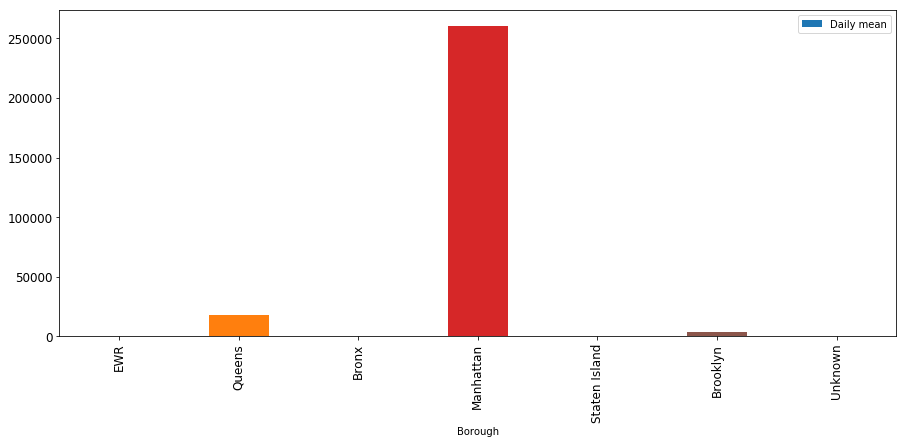

In [27]:
barplot = merge.plot(x="Borough", y="Daily mean", kind='bar', figsize = (15, 6), fontsize = 12)

### Overal NY analysis

In [28]:
# build list of means

l1 = [mean1, mean2, mean3, mean4, mean5, mean6]
l1

[274776.8064516129,
 295547.6785714286,
 295906.03225806454,
 302203.5,
 290421.48387096776,
 283162.9666666667]

In [29]:
df_mean = pd.DataFrame(l1, columns = ['daily average'])
df_mean

,daily average
0,274776.806452
1,295547.678571
2,295906.032258
3,302203.500000
4,290421.483871
5,283162.966667


In [30]:
l2 = ['january', 'february', 'march', 'april', 'may', 'june']

In [31]:
df_month = pd.DataFrame(l2, columns = ['month'])
df_month

,month
0,january
1,february
2,march
3,april
4,may
5,june


In [32]:
merge = df_month.join(df_mean)
merge

,month,daily average
0,january,274776.806452
1,february,295547.678571
2,march,295906.032258
3,april,302203.500000
4,may,290421.483871
5,june,283162.966667


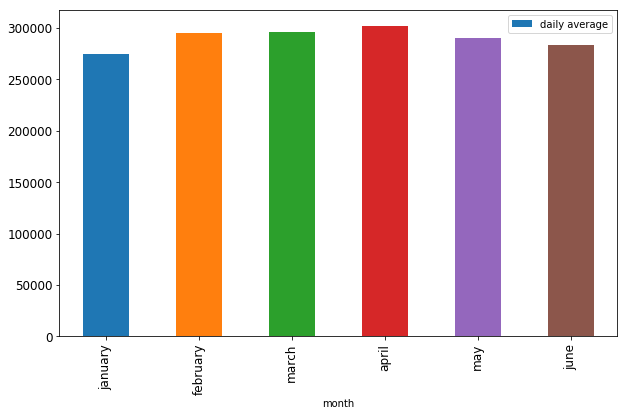

In [33]:
barplot = merge.plot(x = 'month', y = 'daily average', kind = 'bar', figsize = (10, 6), fontsize = 12)